In [62]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.datasets import fashion_mnist
import numpy as np
np.random.seed(1)

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2DTranspose, Conv2D, Input

In [2]:
# We don't need y_train and y_test
(X_train, _), (X_test, _) = fashion_mnist.load_data()

# Train & Test shape
print('Shape of X_train is', X_train.shape)
print('Shape of X_test is', X_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
Shape of X_train is (60000, 28, 28)
Shape of X_test is (10000, 28, 28)


In [3]:
def plot_images(imgs):
    fig, axs = plt.subplots(5, 10)
    fig.tight_layout(pad=-1)
    plt.gray()
    a = 0
    for i in range(5):
        for j in range(10):
            axs[i, j].imshow(tf.squeeze(imgs[a]))
            axs[i, j].xaxis.set_visible(False)
            axs[i, j].yaxis.set_visible(False)
            a = a + 1

def plot_fashion(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.binary,
               interpolation="nearest")
    plt.axis("off")


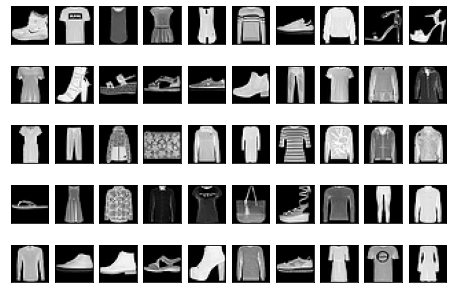

In [4]:
plot_images(X_train)

In [72]:
# Image Normalization
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [73]:
# we need to extend dimentions to add 1-D for grayscale channle
new_X_train = np.expand_dims(X_train, axis=3)
new_X_test = np.expand_dims(X_test, axis=3)

# new_X_train = new_X_train[:, :, :, tf.newaxis]
# new_X_test = new_X_test[:, :, :, tf.newaxis]

# Train & Test shape
print('Shape of new_X_train is', new_X_train.shape)
print('Shape of new_X_test is', new_X_test.shape)

Shape of new_X_train is (60000, 28, 28, 1)
Shape of new_X_test is (10000, 28, 28, 1)


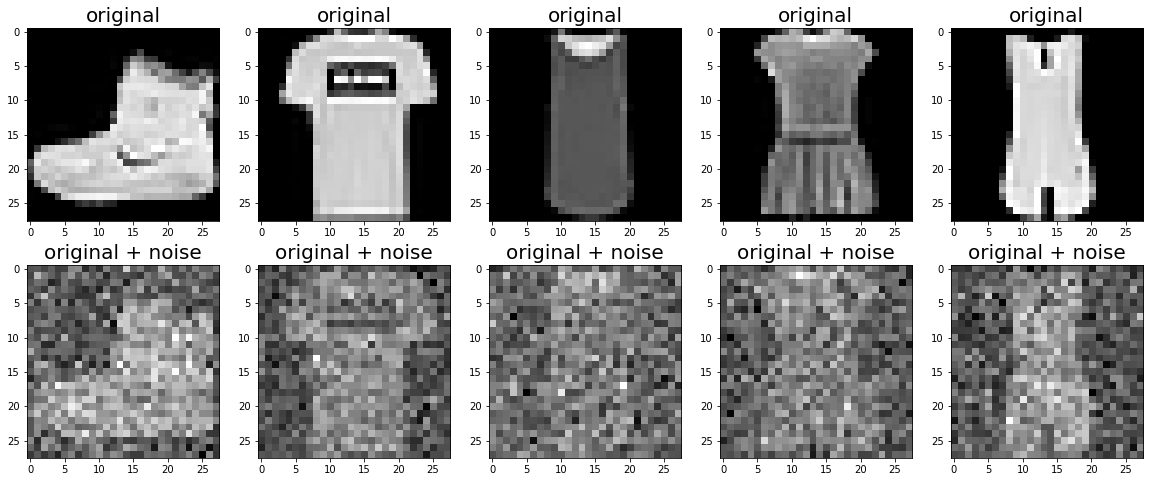

In [81]:
def get_some_noise(data):
    return np.random.randint(0, 100, data.shape)

def get_some_noise2(data, factor=0.4):
    return factor * tf.random.normal(shape=data.shape, seed=42)

# Adding some noise to images
X_train_mod = new_X_train + get_some_noise2(new_X_train)
y_train_mod = new_X_train
X_test_mod = new_X_test + get_some_noise2(new_X_test)
y_test_mod = new_X_test

# Show image after noise Vs Before

n = 5
plt.figure(figsize=(20, 8))
plt.gray()
for i in range(n):
  ax = plt.subplot(2, n, i + 1) 
  plt.title("original", size=20) 
  plt.imshow(tf.squeeze(y_train_mod[i])) 
  plt.gray() 
  bx = plt.subplot(2, n, n+ i + 1) 
  plt.title("original + noise", size=20) 
  plt.imshow(tf.squeeze(X_train_mod[i])) 
plt.show()


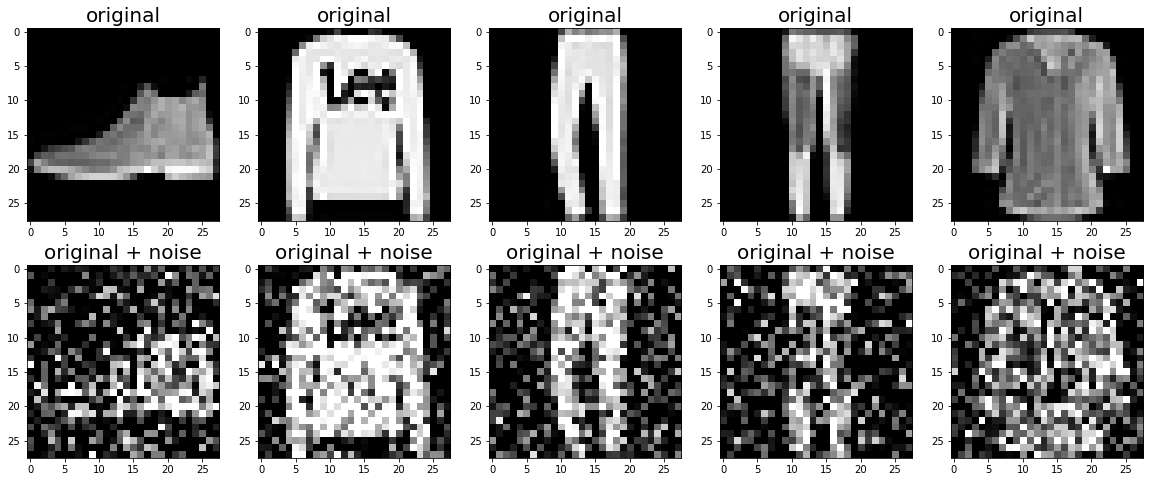

In [82]:
X_train_mod = np.clip(X_train_mod, 0., 1.)
X_test_mod = np.clip(X_test_mod, 0., 1.)


# X_train_mod = tf.clip_by_value(X_train_mod, clip_value_min=0., clip_value_max=1.)
# X_test_mod = tf.clip_by_value(X_test_mod, clip_value_min=0., clip_value_max=1.)

# Show image after clipping
n = 5
plt.figure(figsize=(20, 8))
plt.gray()
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.title("original", size=20)
    plt.imshow(tf.squeeze(y_test_mod[i]))
    plt.gray()
    bx = plt.subplot(2, n, n + i + 1)
    plt.title("original + noise", size=20)
    plt.imshow(tf.squeeze(X_test_mod[i]))
plt.show()


In [83]:
autoencoder = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
    Conv2D(8, (3, 3), activation='relu', padding='same', strides=2),
    Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
    Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
    Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
])

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X_train_mod, 
                y_train_mod, 
                epochs=10, 
                shuffle=True, 
                validation_data=(X_test_mod, y_test_mod))


Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0249 - val_loss: 0.0172
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0166 - val_loss: 0.0163
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0160 - val_loss: 0.0159
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0157 - val_loss: 0.0156
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0154 - val_loss: 0.0153
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0152 - val_loss: 0.0152
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0151 - val_loss: 0.0152
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0149 - val_loss: 0.0149
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0149 - val_loss: 0.0150
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

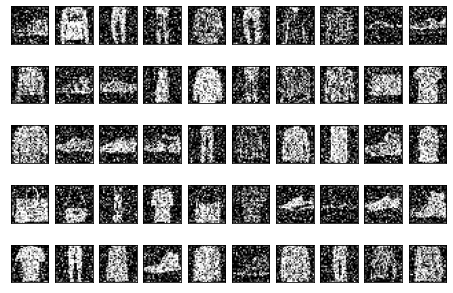

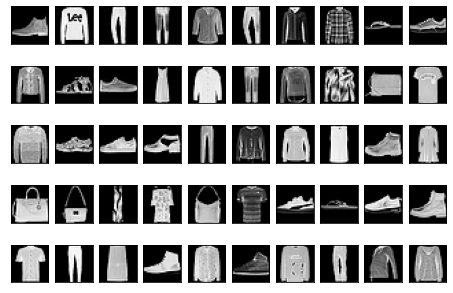

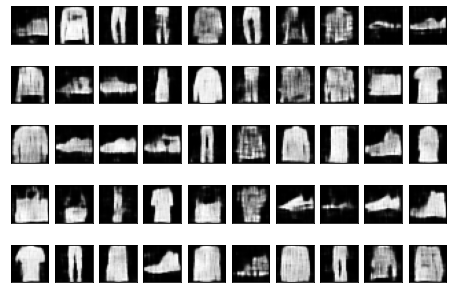

In [84]:
pred_imgs = autoencoder.predict(X_test_mod[0:50])

reshaped_preds = lambda data : np.reshape(data, (data.shape[0], 28, 28))

plot_images(reshaped_preds(X_test_mod[0:50]))
plot_images(reshaped_preds(y_test_mod[0:50]))
plot_images(reshaped_preds(pred_imgs))

In [85]:
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, Input

class NoiseReducer(tf.keras.Model): 
  def __init__(self):

    super(NoiseReducer, self).__init__() 

    self.encoder = tf.keras.Sequential([ 
      Input(shape=(28, 28, 1)), 
      Conv2D(16, (3,3), activation='relu', padding='same', strides=2), 
      Conv2D(8, (3,3), activation='relu', padding='same', strides=2)]) 
    
    self.decoder = tf.keras.Sequential([ 
      Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'), 
      Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'), 
      Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')]) 
  
  def call(self, x): 
    encoded = self.encoder(x) 
    decoded = self.decoder(encoded) 
    return decoded

In [86]:
autoencoder2 = NoiseReducer()

autoencoder2.compile(optimizer='adam', loss='mse')

autoencoder2.fit(X_train_mod, 
                y_train_mod, 
                epochs=10, 
                shuffle=True, 
                validation_data=(X_test_mod, y_test_mod))

encoded_imgs = autoencoder2.encoder(X_test_mod).numpy()
decoded_imgs = autoencoder2.decoder(encoded_imgs)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.0244 - val_loss: 0.0171
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0163 - val_loss: 0.0160
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0156 - val_loss: 0.0154
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0149 - val_loss: 0.0148
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0146 - val_loss: 0.0146
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0145 - val_loss: 0.0145
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0144 - val_loss: 0.0144
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0143 - val_loss: 0.0143
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

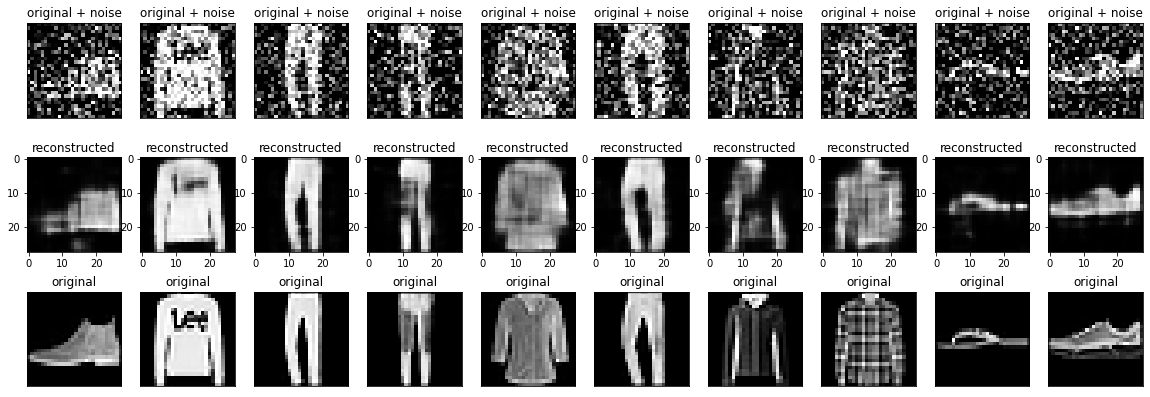

In [87]:
n = 10 
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n): 
  # display original + noise 
  bx = plt.subplot(3, n, i + 1) 
  plt.title("original + noise") 
  plt.imshow(tf.squeeze(X_test_mod[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 
  
  # display reconstruction 
  cx = plt.subplot(3, n, i + n + 1) 
  plt.title("reconstructed") 
  plt.imshow(tf.squeeze(decoded_imgs[i])) 
  bx.get_xaxis().set_visible(False) 
  bx.get_yaxis().set_visible(False) 
  
  # display original 
  ax = plt.subplot(3, n, i + 2*n + 1) 
  plt.title("original") 
  plt.imshow(tf.squeeze(y_test_mod[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 

plt.show()